# CRISP-DM

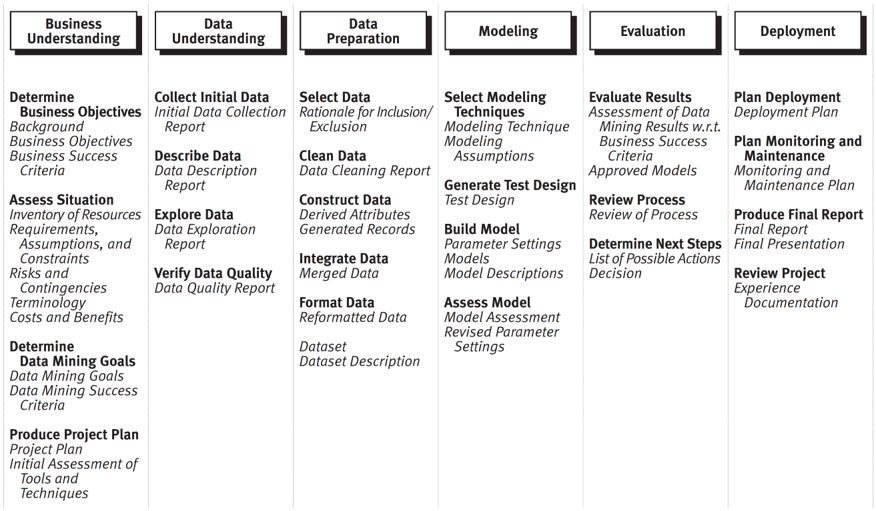

# Step 1: Business Understanding – Framingham Dataset

The Framingham dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## Determine Business Objectives / Data Mining Goals

- **Primary Objective**:
  - Predict the likelihood of a patient developing coronary heart disease (CHD) within the next 10 years based on their risk factors.
- **Secondary Objectives**:
  - Identify the most significant risk factors contributing to CHD.
  - Provide actionable insights to healthcare providers for early intervention and prevention.


## Assess Situation



- **Resources**:
  - Framingham dataset (including variables like age, sex, cholesterol levels, blood pressure, smoking status,
  etc.).  
  Source: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
- **Constraints**:
  - There might be limited or missing data for some patients.
  - Potential biases in the dataset (e.g., demographic representation).

## Project Plan

- **Timeline**:
  - Week 1-2: Data Understanding
  - Week 3: Data Preparation
  - Week 4-5: Modeling
  - Week 6: Evaluation
- **Deliverables**:
  - Data exploration with visualizations to determine best features candidates for modeling and highlight their behaviors.
  - Predictive models for CHD risk, focused on high recall and precision of the positive class.
  - A report summarizing key risk factors and actionable insights.

# Step 2: Data Understanding / Exploratory Data Analysis (EDA)

## Load Libraries

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Collect Initial Data

In [2]:
DATA_FILE = 'framingham.csv'
DATA_FOLDER = './data/'
DF_FILE = 'heart_disease.pkl'

In [3]:
df = pd.read_csv(DATA_FOLDER+DATA_FILE)

## Describe Data

In [4]:
# Display the DataFrame
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
# Print some information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# Count the missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64



**Observations:**
- data types seem correct (we usually code continuous variables as float, discrete and ordinal as int or float and nominal as int or category), but let's double-check
- some features have missing values  

**Conclusions:**  
- we want to define the types of variables and double-check their data types
- we might need to us an imputer for missing values in our model pipeline

### Check data types

We use `float64` (floating point numbers) for continuous variables and variables with missing values, `int64` for discrete and ordinal without missing values, and `category` for nominal features (those where the numeric values don't convey an order but are qualitatively different categories).

In [7]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
con_features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
dis_features = ['age', 'cigsPerDay', ]  # age is here "counts of years"
ord_features = ['education', 'male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']  # we count binary (yes/no) als ordinal as well
nom_features = []
target = 'TenYearCHD'

In [9]:
for feature in con_features:
    df[feature] = df[feature].astype('float64')

for feature in dis_features+ord_features+[target]:
    try:
        df[feature] = df[feature].astype('int64')  # while integer dtypes are more suitable, they don't support missing values
    except pd.errors.IntCastingNaNError:
        df[feature] = df[feature].astype('float64')  # hence we cast those with missing values also to float64

for feature in nom_features:
    df[feature] = df[feature].astype('category')

In [10]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

## Explore Data

### Target Distribution

In [11]:
# Display how many data points are in each class
df[target].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [12]:
# Let's create a Pie Chart of the counts
# https://plotly.com/python/pie-charts/
# https://plotly.com/python/discrete-color/
px.pie(
    df,
    values=df[target].value_counts().values,
    names=["0: Healthy", "1: CHD"],
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title=f'Distribution of {target}',
    width=600,
    height=600,
)

**Observation:**
- target is binary
- class 0 ('Healthy') has 5.5 times as many occurences than class 1 ('CHD') $\rightarrow$ class-imbalance

**Conclusions:**
- we can use binary classification models
- we might have to consider class-balancing if the model is sensitive to class imbalances (e.g. using undersampling or oversampling)

### Multicollinearity

Multicollinearity is the occurrence of *high intercorrelations* among two or more features in a multiple regression model.

**How to check?**  
- Visual inspection of the correlation matrix.
- Variance Inflation Factor (VIF): $\mathrm{VIF}_𝑖=  1/(1−𝑅_𝑖^2 )$ <br> $𝑅_𝑖^2$: coefficient of determination (proportion of variation that is predictable from the 𝑖-th feature)


#### Correlation Matrix

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)


Matplotlib is building the font cache; this may take a moment.


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.00,-0.03,0.02,0.20,0.32,-0.05,-0.00,0.01,0.02,-0.07,-0.04,0.06,0.08,-0.12,0.01,0.09
age,-0.03,1.00,-0.17,-0.21,-0.19,0.12,0.06,0.31,0.10,0.26,0.39,0.21,0.14,-0.01,0.12,0.23
education,0.02,-0.17,1.00,0.02,0.01,-0.01,-0.04,-0.08,-0.04,-0.02,-0.13,-0.06,-0.14,-0.05,-0.04,-0.05
currentSmoker,0.20,-0.21,0.02,1.00,0.77,-0.05,-0.03,-0.10,-0.04,-0.05,-0.13,-0.11,-0.17,0.06,-0.06,0.02
cigsPerDay,0.32,-0.19,0.01,0.77,1.00,-0.05,-0.03,-0.07,-0.04,-0.03,-0.09,-0.06,-0.09,0.08,-0.06,0.06
BPMeds,-0.05,0.12,-0.01,-0.05,-0.05,1.00,0.12,0.26,0.05,0.08,0.25,0.19,0.10,0.02,0.05,0.09
prevalentStroke,-0.00,0.06,-0.04,-0.03,-0.03,0.12,1.00,0.07,0.01,0.00,0.06,0.05,0.03,-0.02,0.02,0.06
prevalentHyp,0.01,0.31,-0.08,-0.10,-0.07,0.26,0.07,1.00,0.08,0.16,0.70,0.62,0.30,0.15,0.09,0.18
diabetes,0.02,0.10,-0.04,-0.04,-0.04,0.05,0.01,0.08,1.00,0.04,0.11,0.05,0.09,0.05,0.62,0.10
totChol,-0.07,0.26,-0.02,-0.05,-0.03,0.08,0.00,0.16,0.04,1.00,0.21,0.17,0.12,0.09,0.05,0.08


**Observations:**
- Target Correlations:
    - the target is most correlated with age, BP (sysBP, diaBP, prevalentHyp) and diabetes (glucose, diabetes)
    - the target is least correlated with heartRate, currentSmoker, education

- Feature Correlations:
    - sysBP, diaBP and prevalentHyp correlated (makes sense: prevalentHyp is decided based on sysBP and diaBP and both BPs have common causes); they are further weakly correlated with BPMeds
    - diabetes and glucose are correlated (makes sense)
    - currentSmoker and cigsPerDay are highly correlated (makes sense)



#### Variance Inflation Factor

In [14]:
df_with_constant = add_constant(df.dropna())
pd.Series([variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])], index=df_with_constant.columns)

const              198.322417
male                 1.212630
age                  1.391817
education            1.055397
currentSmoker        2.584841
cigsPerDay           2.738053
BPMeds               1.111725
prevalentStroke      1.018353
prevalentHyp         2.052271
diabetes             1.616007
totChol              1.116602
sysBP                3.792539
diaBP                3.001877
BMI                  1.239750
heartRate            1.093520
glucose              1.643795
TenYearCHD           1.112539
dtype: float64

**Observations:**
- there are some correlated features, but the VIF is below 5 for all features $\rightarrow$ no strong multicollinearity

**Conclusions:**
- We don't need to worry much about multicollinearity, though some features are related and need to be investigated together:
  - sysBP, diaBP, prevalentHyp, BPMeds
  - diabetes, glucose
  - currentSmoker, cigsPerDay


### Investigate Feature: 'age'

Let's start by investigation the distribution of just the variable itself:

In [15]:
# https://plotly.com/python/distplot/
px.histogram(
    df,
    x='age',
    width=800, height=500,
    template='simple_white',
    title='Distribution of Age',
)

**Observations:**
- the feature is well and broughtly distributed over all ages from ca. 35 to 67 years
- there are no visible outliers or data errors

Let's now check, if we see a possible effect of the feature on the target:

Since the "age" feature is *discretized continuous* (allowing only for whole numbers), we can easily group the same values together and calculate the probability of 10-year coronary heart disease.

In [16]:
px.scatter(
    df.groupby('age')[target].mean(),
    error_y=df.groupby('age')[target].sem(),
    width=800, height=500,
    labels={"value": f"probability of {target}"},
    template='simple_white',
    title=f'Probability of {target} by age',
).update_layout(
    showlegend=False
)

Fitting a linear function to a probability (which lies between 0 and 1) usually doesn't make a ton of sense. Instead, we usually want to look at the odds, or *log-odds* instead. (In practice, log-odds are almost always used in statistical modeling (e.g., logistic regression), while odds are often used for interpretation and communication.)

**Log-Odds Examples:**

**Example 1:**  
Class 1 happens in 75% of cases  
Class 2 happens in 25% of cases  
The odds of Class 1 are then **3 : 1**,  
leading to log-odds of ln(3) = **1,1**  

**Example 2:**  
Class 1 happens in 50% of cases  
Class 2 happens in 50% of cases  
The odds of Class 1 are then **1 : 1**,  
leading to log-odds of ln(1) = **0**  

**Example 3:**  
Class 1 happens in 25% of cases  
Class 2 happens in 75% of cases  
The odds of Class 1 are then **1/3 : 1**,  
leading to log-odds of ln(1/3) = **-1,1**  



In [17]:
p = df.groupby('age')[target].mean()
p = p.loc[(p>0)&(p<1)]
log_odds = np.log(p/(1-p))
px.scatter(
    log_odds,
    trendline="ols",
    labels={"value": f"log-odds {target}"},
    width=800, height=500,
    template="simple_white",
    title=f'Log-Odds of {target} by Age',
).update_layout(showlegend=False)

**Observations:**
- the chance of TenYearCHD appears to be increasing with the age
- the log-odds show a linear behavior

**Conclusions:**
- use age as a feature
- could consider clipping for \<35 and \>67 years
- especially good candidate for a logistic model


### Investigate Feature: 'sysBP' (systolic Blood Pressure)

In [18]:
px.scatter(
    df.groupby('sysBP')[target].mean(),
    width=800, height=500,
    labels={"value": f"mean {target}"},
    template='simple_white',
)

The "sysBP" is also discretized continous, but allows for many more values such that we have many values that only occur once in the data (and it would be much worse, if the feature would be fully continous).

Hence, we will not group by value in a scatter plot here, but we will be using a histogram that bins values in certain ranges together (e.g. \[90, 99.9\], \[100, 109.9\], \[110,119.9\] etc.).

Let's see different options and discuss which is best to show what kind of information:

#### Stacked Bar Chart

In [19]:
px.histogram(
    df,
    x='sysBP',
    color=target,
    nbins=40,
    width=800, height=400,
    template="simple_white",
    color_discrete_sequence=px.colors.qualitative.Dark2,
).update_layout(
    yaxis_title=f"occurences {target}"
)

#### Overlayed/Grouped Bar Charts

In [20]:
px.histogram(
    df,
    x='sysBP',
    color=target,
    barmode='overlay',
    opacity=0.8,
    nbins=40,
    width=800, height=400,
    template="simple_white",
    color_discrete_sequence=px.colors.qualitative.Dark2,
).update_layout(
    yaxis_title=f"occurences {target}"
)

In [21]:
px.histogram(
    df,
    x='sysBP',
    color=target,
    barmode='group',
    marginal="box",
    nbins=40,
    width=800, height=500,
    template="simple_white",
    color_discrete_sequence=px.colors.qualitative.Dark2,
).update_layout(
    yaxis_title=f"occurences {target}"
)

**Observations:**
using the Stacked Bar Chart or the Grouped Bar Chart, we can visualize the distribution of the variable:  
- the sysBP is a skewed normal distribution with a heavy right tail  
$\rightarrow$ careful not to use IQR as outlier detection, as that would cut the important right tail  
- the median of healthy patients is at 127, the median of CHD patients is at 139  
$\rightarrow$ first indicator that there might be an effect of the sysBP on the target

#### 100% Stacked Bar Chart (Bar Chart with Percentage Normalization)

In [22]:
px.histogram(
    df.loc[df.sysBP.between(100, 200)],
    x='sysBP',
    color=target,
    barnorm='percent',
    nbins=10,
    width=800, height=400,
    template="simple_white",
    color_discrete_sequence=px.colors.qualitative.Dark2,
).update_layout(
    yaxis_title=f"percentage {target}"
)

**Observations:**  
using the 100% Stacked Bar Chart, we can visualize the change of the target distribution within the feature
-  the chance of TenYearCHD appears to be increasing with the sysBP

**Conclusions:**
- use sysBP as feature
- do not use IQR for outlier detection in this feature, as it has an important heavy right tail

### Correlation of sysBP & diaBP vs. prevalentHyp

Different features might hold the same or similar information $\rightarrow$ which to choose?

If for example Feature A and Feature B are strongly correlated, it might be that
1. Feature A holds the same information that Feature B holds  
$\rightarrow$ use either Feature A or Feature B  
e.g. €/m² vs. €/km²

2. Feature A holds all the information that Feature B holds and more  
$\rightarrow$ if Feature A holds additional information, use Feature A  
$\rightarrow$ if Feature A holds additional noise, use Feature B  
e.g. currentSmoker vs. cigsPerDay

3. Feature A and Feature B have some overlap in information but both hold further information as well  
$\rightarrow$ use Feature A and Feature B  
e.g. sysBP vs. diaBP

In [23]:
corr = df.loc[:, ["sysBP","diaBP","prevalentHyp",target]].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,sysBP,diaBP,prevalentHyp,TenYearCHD
sysBP,1.00,0.78,0.70,0.22
diaBP,0.78,1.00,0.62,0.15
prevalentHyp,0.70,0.62,1.00,0.18
TenYearCHD,0.22,0.15,0.18,1.00


The features and their values is  actual real-world data. Always check for background information to understand what your features represent and think about what that means in the real world:

<table class="table table-responsive table-striped"><caption class="hiddentext" style="visibility: hidden;">Blood Pressure Chart</caption> <thead class="thead-dark"><tr style="color: rgb(255, 255, 255); background-color: rgb(78, 81, 82); font-size: 0.8rem;"><th scope="col">BLOOD PRESSURE CATEGORY</th> <th scope="col">SYSTOLIC mm Hg (upper number)</th> <th scope="col">and/or</th> <th scope="col">DIASTOLIC mm Hg (lower number)</th></tr></thead> <tbody><tr style="color: rgb(0, 0, 0); background-color: rgb(166, 206, 57); font-size: 0.8rem;"><th scope="row">NORMAL</th> <td data-label="SYSTOLIC mm Hg (upper number)">LESS THAN 120</td> <td data-label="and/or">and</td> <td data-label="DIASTOLIC mm Hg (lower number)">LESS THAN 80</td></tr> <tr style="color: rgb(0, 0, 0); background-color: rgb(255, 236, 0); font-size: 0.8rem;"><th scope="row">ELEVATED</th> <td data-label="SYSTOLIC mm Hg (upper number)">120 – 129</td> <td data-label="and/or">and</td> <td data-label="DIASTOLIC mm Hg (lower number)">LESS THAN 80</td></tr> <tr style="color: rgb(0, 0, 0); background-color: rgb(255, 182, 0); font-size: 0.8rem;"><th scope="row">HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1</th> <td data-label="SYSTOLIC mm Hg (upper number)">130 – 139</td> <td data-label="and/or">or</td> <td data-label="DIASTOLIC mm Hg (lower number)">80 – 89</td></tr> <tr style="color: rgb(255, 255, 255); background-color: rgb(186, 58, 2); font-size: 0.8rem;"><th scope="row">HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 2</th> <td data-label="SYSTOLIC mm Hg (upper number)">140 OR HIGHER</td> <td data-label="and/or">or</td> <td data-label="DIASTOLIC mm Hg (lower number)">90 OR HIGHER</td></tr> <tr style="color: rgb(255, 255, 255); background-color: rgb(153, 7, 17); font-size: 0.8rem;"><th scope="row"><a href="/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings/hypertensive-crisis-when-you-should-call-911-for-high-blood-pressure" style="color: rgb(255, 255, 255); text-decoration: underline;">HYPERTENSIVE CRISIS</a> (consult your doctor immediately)</th> <td data-label="SYSTOLIC mm Hg (upper number)">HIGHER THAN 180</td> <td data-label="and/or">and/or</td> <td data-label="DIASTOLIC mm Hg (lower number)">HIGHER THAN 120</td></tr></tbody></table>
Source: <a href="https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings">https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings</a>

In [24]:
df["prevalentHyp"] = df["prevalentHyp"].astype("category")  # changes the display in the plot to a categorical display

In [25]:
fig = px.scatter(
    df,
    x="diaBP",
    y="sysBP",
    color="prevalentHyp",
    opacity=0.7,
    category_orders={"prevalentHyp": [0, 1]},
    width=800, height=500,
    template='simple_white',
    range_x=[40, 160],
    range_y=[60, 300],
)

fig.show()

Let's add some color to mark the Blood Pressure Categories:

In [26]:
# Normal
fig.add_shape(type="rect", x0=0, y0=0, x1=80, y1=120, fillcolor="green", opacity=0.2)

# Elevated
fig.add_shape(type="rect", x0=0, y0=120, x1=80, y1=130, fillcolor="yellow", opacity=0.2)

# Stage 1
fig.add_shape(type="rect",x0=0, y0=130, x1=90, y1=140, fillcolor="orange", opacity=0.2)
fig.add_shape(type="rect", x0=80, y0=0, x1=90, y1=130, fillcolor="orange", opacity=0.2)

# Stage 2
fig.add_shape(type="rect", x0=0, y0=140, x1=120, y1=180, fillcolor="red", opacity=0.2)
fig.add_shape(type="rect", x0=90, y0=0, x1=120, y1=140, fillcolor="red", opacity=0.2)

# Crisis
fig.add_shape(type="rect", x0=0, y0=180, x1=160, y1=300, fillcolor="darkred", opacity=0.2)
fig.add_shape(type="rect", x0=120, y0=0, x1=160, y1=180, fillcolor="darkred", opacity=0.2)


fig.show()

**Observations:**
-  it seems that the prevalentHyp feature shows Hypertension Stage 2 and some of Hypertension Stage 1 (but only if both sysBP and diaBP are high, so using an "and" instead of "or", but not always)
- in quite some cases the values seem to be recorded completely incorrectly, which might be an error in either of the three variables or a decision by the doctor to record it as Hypertension even when the BP-criteria were not formally met  

**Conclusions:**
- prevalentHyp seems unreliable and it's questionable that it provides (enough) additional information to sysBP and diaBP
- prevalentHyp might still be considered as a 'maybe' feature candidate
- when using prevalentHyp, it should be checked if recreating the feature from sysBP and diaBP improves or worsens results

### ❗ **Homework** ❗ Investigate Features: 'currentSmoker' & 'cigsPerDay'

**1.** Create a pie chart of the distribution of Smokers vs. Non-Smokers. You can see the intended result below. Write down your observations!

In [ ]:
px.pie(
     df
)

**Observations:**  
- ...

**2.** Create a Bar Chart that shows the probability of TenYearCHD by currentSmoker. To do so copy the Scatter Plot for 'Probability of TenYearCHD by age', change the feature from `age` to `currentSmoker` and change `px.scatter` to `px.bar`. You can see the intended result below. Write down your observations!

In [ ]:
px.bar(
    ...
)

**Observations:**  
- ...

**Challenge [optional]:** Calculate if the difference in the distributions is significant.

**3.** Create a Histogram displaying the counts of cigsPerDay. Use 'currentSmoker' as color. Do not specify the parameter `nbins` (yet). You can see the intended result below. What do you notice about the data distribution? Write down your observations!

In [ ]:
px.histogram(
    ...
)

**Observations:**  
- ...

**4.** Try out various visualizations to see if there is an effect of cigsPerDay on the target and keep the best one. You can see an example solution below. Write down your observations!

In [ ]:
px.histogram(
    ...
)

**Observation:**  
- ...


**Challenge [optional]:** Calculate if the observed trend in cigsPerDay vs TenYearCHD is significant.

**5.** Summarize your conclusions and required actions.

**Conclusions:**
- ...